# Homework 7
Rob Lisy

Short narrative on the data preparation for your chosen data set for Milestone 3, which in most cases should be the same as Milestone 2.
- number of observations and attributes
- datatype, distribution, and a comment on each attribute
- Source citation for your data set
- Ask at least 1 yes-no or binary-choice question (Does it...? Is it...?)
- Ask at least 1 non-binary question (What is...? How many...? When does...?)
- Perform a K-Means with sklearn using some or all of your attributes.
    - Include at least one categorical column and one numeric attribute.
    - Normalize the attributes prior to K-Means.
    - Add the cluster label to the dataset.
- Add comments to explain the code blocks.
- Add a summary comment block that describes the cluster labels.

In [1]:
import pandas as pd
import numpy as np
import requests
from os import path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans


filename = f"data/adult.csv"

# This data set is adult income by the US Census Bureau
# Hosted at UC Irvine at the URL here:
# https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

def download_if_not_exists(URL: str, filename: str):
    """
    Helper function to download the file at the URL if it doesn't already exist
    :param URL: A string with the URL location
    :param filename: The file name on disk
    """
    
    if path.exists(f"{filename}"):
        return
    else:
        req = requests.get(URL)
        url_content = req.content
        csv_file = open(f"{filename}", 'wb')
        csv_file.write(url_content)
        csv_file.close()
    return

download_if_not_exists("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                      filename)
                        
# import the CSV as a data set
df = pd.read_csv(filename, header=None)

# First name the columns...        
col_names = {0:'age', 1:'workclass', 2:'fnlwgt', 3:'education', 4:'education_num', 5:'marital_status', 6:'occupation', 
            7:'relationship', 8:'race', 9:'sex', 10:'capital_gain', 11:'capital_loss', 12:'hours_per_week',
            13: 'native_country', 14:'income'}

# drop the weight column.
df.rename(columns = col_names, inplace=True)
drops = ['fnlwgt']
df = df.drop(drops, axis=1)
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
# Check column types...
df.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

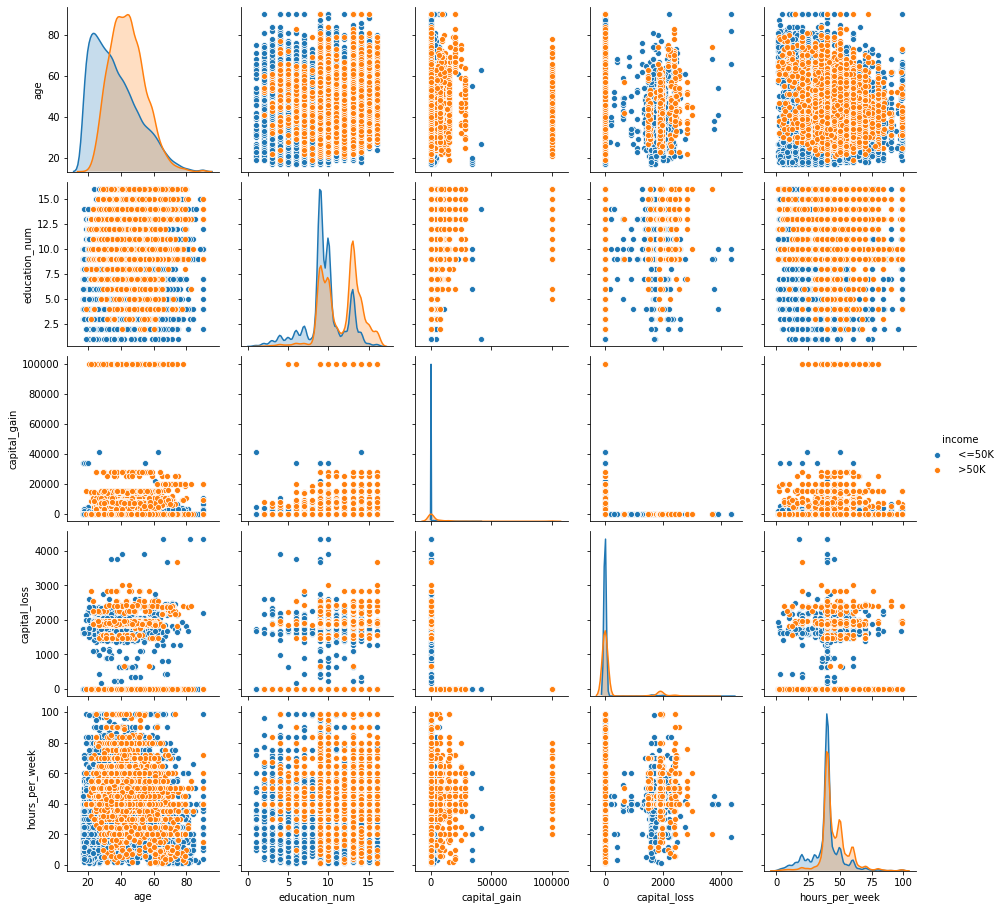

In [3]:
# Plot the data
# you're not a data scientist if you don't plot interactions.
# sticking mostly to non-categorical variables.
plot_vars = df.select_dtypes(include='number')
sns.pairplot(df, 
             vars=plot_vars, 
             hue='income'
            );

In [4]:
# One binary choice question:
# Is the level of education above median?
median_education = df['education_num'].median()
df['education_above_median'] = df['education_num'].apply(lambda x: 'True' if x >= median_education else 'False')
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,education_above_median
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,True
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,True


In [5]:
# Ask at least 1 non-binary question (What is...? How many...? When does...?)
# What's the distribution of marital status?
#df['marital_status'].value_counts()
pd.crosstab(df['marital_status'], df['income'])

# Super interesting - looks like not getting married is paried tightly with incomes < $50k.

income,<=50K,>50K
marital_status,,
Divorced,3980,463
Married-AF-spouse,13,10
Married-civ-spouse,8284,6692
Married-spouse-absent,384,34
Never-married,10192,491
Separated,959,66
Widowed,908,85


In [6]:
# Normalize attributes prior to a KMeans clustering
# using Z score normalization.
which_cols = df.select_dtypes(include='number')
for col in which_cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,education_above_median,age_zscore,education_num_zscore,capital_gain_zscore,capital_loss_zscore,hours_per_week_zscore
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,True,0.030671,1.134739,0.148453,-0.21666,-0.035429
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True,0.837109,1.134739,-0.145920,-0.21666,-2.222153
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False,1.057047,-1.197459,-0.145920,-0.21666,-0.035429
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,True,-0.775768,1.134739,-0.145920,-0.21666,-0.035429


In [7]:
# Now onehot encode a categorical col
hot_encode_cols = ['race', 'sex']

df_cats = df[hot_encode_cols]
onehot = OneHotEncoder(sparse = False) # initialize one-hot-encoder
onehot.fit(df_cats)
col_names = onehot.get_feature_names(df_cats.columns)
bank_onehot = pd.DataFrame(onehot.transform(df_cats), columns = col_names)
bank_onehot.head()

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [8]:
# append the one-hot encoded data frame back
df = pd.concat([df, bank_onehot],axis=1)
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,capital_gain_zscore,capital_loss_zscore,hours_per_week_zscore,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,0.148453,-0.21666,-0.035429,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,-0.145920,-0.21666,-2.222153,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,-0.145920,-0.21666,-0.035429,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,-0.145920,-0.21666,-0.035429,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
# Gather the columns for the KMeans
# we'll need the one hot encoded columns plus the zscore cols
zscores =[col for col in df if col.endswith('zscore')] 
col_names = list(col_names)
cluster_cols = col_names + zscores

print(cluster_cols)

['race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White', 'sex_ Female', 'sex_ Male', 'age_zscore', 'education_num_zscore', 'capital_gain_zscore', 'capital_loss_zscore', 'hours_per_week_zscore']


In [18]:
# Normalize the attributes prior to K-Means.
n_clusters = 4 # the number of clusters

X = df[cluster_cols]
kmeans = KMeans(n_clusters = n_clusters, random_state = 0) # step 1: initialize
kmeans.fit(X) # step 2, learn the clusters
df['cluster'] = kmeans.predict(X) # step 3, assign a cluster to each row
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,capital_loss_zscore,hours_per_week_zscore,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,cluster
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,-0.21666,-0.035429,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,-0.21666,-2.222153,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,-0.21666,-0.035429,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,-0.21666,-0.035429,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,-0.21666,-0.035429,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [19]:
# How many observations are in each cluster?
df['cluster'] = df['cluster'].astype('category')
df['cluster'].value_counts()

3    15659
0    15259
1     1484
2      159
Name: cluster, dtype: int64

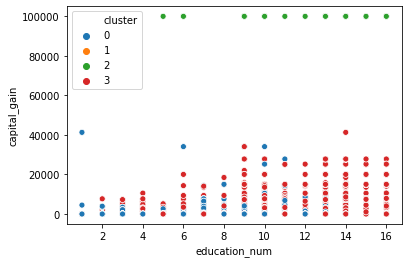

In [20]:
# Plot the cluster groupings.
sns.scatterplot(x = 'education_num', 
                y = 'capital_gain', 
                hue = 'cluster', 
                data = df);

# Summary

I've taken the Census income data set, read in from a CSV. I dropped one column (`fnlgwt`). I pairs plotted the  data to see interesting relationships.

After this, I created a categorical decision (True/False) on if a given observation had more than the median education. I then used a cross table to show the populations of observations who had incomes >= $50k, split by marital status.

I used Z-scoring to normalize the numeric columns so that the larger scale columns don't have undue influence. I then one-hot encoded 2 categorical variables (race and sex) so they could be included in the clustering. After this I ran KMeans and appended the values for the predicted cluster back to the original dataframe.
